# Linear Model Used Car Price Predictor 
**Due: Wednesday, 09/25/2024, 2:30 PM**

Welcome to your first assignment! You will train a linear model to predict a used car's price based on its age.


Exercises:
1. $\color{violet}{\textbf{(10\%) Data Visualization}}$
2. $\color{violet}{\textbf{(10\%) Create a Linear Model}}$
3. $\color{violet}{\textbf{(10\%) Calculate Mean Square Error}}$
4. $\color{violet}{\textbf{(60\%) Gradient Descent Optimization}}$
5. $\color{violet}{\textbf{(10\%) Test Model with New Data}}$


**Instructions:**
- Write your code only between the $\color{green}{\textbf{\small \#\#\# START CODE HERE \#\#\#}}$ and $\color{green}{\textbf{\small \#\#\# END CODE HERE \#\#\#}}$ commented lines. $\color{red}{\textbf{Do not modify code out of the designated area.}}$
- Reference answers are provided after a certain coding blocks. Be aware if your answer is different from the reference..
- Avoid using for-loops and while-loops, unless you are explicitly told to do so.

**After this assignment you will:**

- Be able to train a neural network model with the simplest form: single-in, single-out linear function.
    - Initialize weight and bias parameters.
    - Use a loss function to evaluate the model's performance.
    - Optimize the weight and bias parameters using gradient descent algorithm.
- Get more used to vectorization using NumPy.

## 1 - Load the Data ##
The objective is to predict a car's price given its age. And we need data to build such a predictor (model). First, let's load, rescale and reshape the data. Then, plot a figure to roughly observe the relationship between ages and prices of the cars.
#### $\color{violet}{\textbf{(10\%) Exercise 1: Data Pre-Processing}}$
**Note: Do not connect datapoints with lines.**


dimension of raw features: 1, shape of raw features: (268577,)
dimension of raw labels: 1, shape of raw labels: (268577,)
fisrt 5 samples: (array([13.,  6.,  5.,  4.,  9.]), array([ 3500, 26000, 24971, 39990,  8495]))
fisrt 5 processed features: [[1.3]
 [0.6]
 [0.5]
 [0.4]
 [0.9]]
fisrt 5 processed labels: [[0.35  ]
 [2.6   ]
 [2.4971]
 [3.999 ]
 [0.8495]]


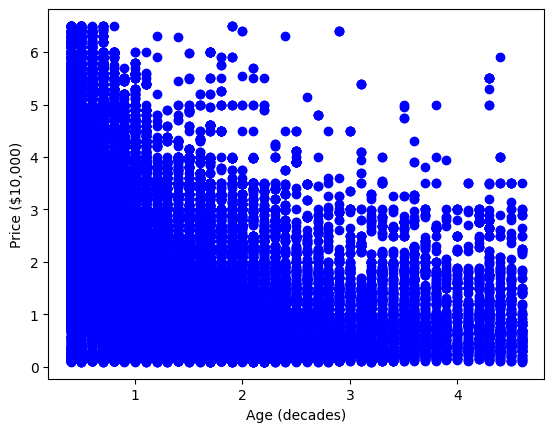

In [2]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the data (year, price)
X_raw = np.load("years_train.npy")
y_raw = np.load("prices_train.npy")
print(f"dimension of raw features: {X_raw.ndim}, shape of raw features: {X_raw.shape}")
print(f"dimension of raw labels: {y_raw.ndim}, shape of raw labels: {y_raw.shape}")
print(f"fisrt 5 samples: {X_raw[:5], y_raw[:5]}")

# Pre-process the data: rescale and reshape
X_rescale = X_raw / 10    # rescale to per decade
y_rescale = y_raw / 1e4  # rescale to per $10,000
### START CODE HERE ### (≈ 2 line of code)
X_reshape = X_rescale.reshape(-1, 1)
y_reshape = y_rescale.reshape(-1, 1)
### END CODE HERE ###
print(f"fisrt 5 processed features: {X_reshape[:5]}")
print(f"fisrt 5 processed labels: {y_reshape[:5]}")

# Visualize the data
plt.xlabel("Age (decades)")
plt.ylabel("Price ($10,000)")
### START CODE HERE ### (≈ 1 line of code)
plt.plot(X_reshape, y_reshape, 'bo')
### END CODE HERE ###


**Expected Output**:
>
```console
fisrt 5 processed features: [[1.3]
 [0.6]
 [0.5]
 [0.4]
 [0.9]]
fisrt 5 processed labels: [[0.35  ]
 [2.6   ]
 [2.4971]
 [3.999 ]
 [0.8495]]
```

## 2 - Create a Model
Create a linear model: $\hat{y} = wx + b$ govern by the weight parameter, $w$ and bias parameter, $b$. The independent variable, $x$ indicates the age of a car, and the dependent variable $\hat{y}$ is the predicted price of the car.
#### $\color{violet}{\textbf{(10\%) Exercise 2: Create a Linear Model}}$


In [7]:
def linear(input, weight, bias):
    """
    Linear model function
        Args:
            input: input features to linear model, (2d) numpy array
            weight: weight of linear model, scalar
            bias: bias of linear model, scalar
        Returns:
            output: predicted output from linear model, (2d) numpy array
    """
    ### START CODE HERE ### (≈ 1 line of code)
    output =  weight * input + bias
    ### END CODE HERE ###
    return output

# Sanity check
print(f"The model's output from 4 input values: {linear(np.linspace(-0.2, 0.2, 4).reshape(-1, 1), 2, -3)}")

The model's output from 4 input values: [[-3.4       ]
 [-3.13333333]
 [-2.86666667]
 [-2.6       ]]


**Expected Output**:
>
```console
The model's output from 4 input values: [[-3.4       ]
 [-3.13333333]
 [-2.86666667]
 [-2.6       ]]
```

To initialize the model, we need to initialize $w$ and $b$. It is very common in deep learning to initialize the parameters to small values. And we can visualize the initial model after that.

In [ ]:
np.random.seed(3321)
# Initialize model
w = np.random.normal(loc=0, scale=1e-4)
b = np.random.normal(loc=0, scale=1e-4)
print(f"w0={w}, b0={b}")
# Visualize the model
plt.xlabel("Age (decades)")
plt.ylabel("Price ($10,000)")
plt.plot(X_reshape, y_reshape, 'o')
plt.plot([0, 5], linear(np.array([0, 5]).reshape(-1, 1), w, b), 'r')
print(f"Model's MSE loss: {mse_loss(pred=linear(X_reshape, w, b), target=y_reshape)}")


## 3 - Evaluate the Model
We need a criteria to evaluate the performance of the model. Mean square error function: $\mathcal{L}(\hat{y}, y) = \frac{1}{M}\Sigma_{i=1}^M \frac{1}{2}(\hat{y}_i - y_i)^2$ is usually applied to calculate the averaged error between the model predictions and groundtrue labels. $M$ is the total number of samples, $\hat{y}$ is the model predicted output, $y$ is the label (true value), $i$ is the index of the sample.

#### $\color{violet}{\textbf{(10\%) Exercise 3: Calculate Mean Square Error}}$


Model's MSE loss: 17.729999999999997


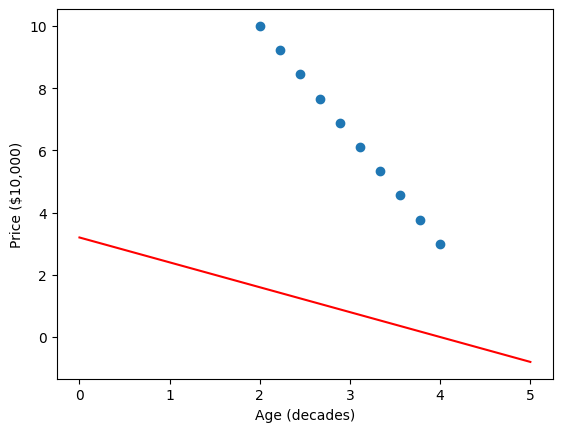

In [15]:
def mse_loss(pred, target):
    """
    Mean square error (MSE) function
        Args:
            pred: model predicted value, (2d) numpy array
            target: true value, (2d) numpy array
        Returns:
            loss_value: averaged MSE error, scalar
    """
    ### START CODE HERE ### (≈ 2 line of code)
    loss_value = np.mean(0.5 * (pred - target) ** 2)
    ### END CODE HERE ###
    return loss_value

# Sanity check
w = -0.8
b = 3.2
X_dummy = np.linspace(2, 4, 10).reshape(-1, 1)  # fake data for sanity check
y_dummy = np.linspace(10, 3, 10).reshape(-1, 1)
# Visualize the model
plt.xlabel("Age (decades)")
plt.ylabel("Price ($10,000)")
plt.plot(X_dummy, y_dummy, 'o')
plt.plot([0, 5], linear(np.array([0, 5]).reshape(-1, 1), w, b), 'r')
print(f"Model's MSE loss: {mse_loss(pred=linear(X_dummy, w, b), target=y_dummy)}")

**Expected Output**:
>
```console
Model's MSE loss: 17.729999999999997
```

## 4 - Gradient Descent Optimization
We need to calculate the gradient of the loss function $\mathcal{L}$ (derivatives with respect to $w$ and $b$). The purpose of doing so is to determine directions that increment $w$ and $b$ to reduce the MSE loss of the model. The gradient of the loss function can be computed as:

$\frac{\partial \mathcal{L}}{\partial w} = \frac{1}{M}\Sigma_{i=1}^M(\hat{y}_i - y_i)x_i$

$\frac{\partial \mathcal{L}}{\partial b} = \frac{1}{M}\Sigma_{i=1}^M(\hat{y}_i - y_i)$

To optimize $w$ and $b$, we need to perform gradient descent algorithm:

$\textbf{Initialize } w, b$

$\text{\textbf{Repeat} until converge } \{$

&nbsp; &nbsp; &nbsp; &nbsp; $\text{compute } \frac{\partial \mathcal{L}}{\partial w} \text{, and } \frac{\partial \mathcal{L}}{\partial b}$

&nbsp; &nbsp; &nbsp; &nbsp; $w := w - \alpha \frac{\partial \mathcal{L}}{\partial w}$

&nbsp; &nbsp; &nbsp; &nbsp; $b := b - \alpha \frac{\partial \mathcal{L}}{\partial b}$

$\}$

where $\alpha$ is the learning rate (step size).

#### $\color{violet}{\textbf{(60\%) Exercise 4: Gradient Descent Optimization}}$
Please complete the following two tasks in the next code block.
1. Define a function to compute gradient ($\frac{\partial \mathcal{L}}{\partial w}$ and $\frac{\partial \mathcal{L}}{\partial b}$)
2. Use a iterative loop to update $w$ and $b$. **Please store model loss in each iteration to a list/array.**

You can replace `None`s with appropriate variables or operations.


In [ ]:
def grad(x, y, yhat):
    """
    Compute gradient of loss function
        Args:
            x: independent variables, a 1-D numpy array
            y: true value, a 1-D numpy array
            yhat: model predicted value, a 1-D numpy array
        Returns:
            dw: dL/dw, a scalar
            db: dL/db, a scalar
    """
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = None  # dL/dw
    db = None  # dL/db
    ### END CODE HERE ###

    return dw, db

# Optimization
### START CODE HERE ### (≈ 7 lines of code)
num_iters = None
learning_rate = None
losses = []  # storage for loss at each iteration
for i in range(num_iters):
    pred = None
    dw, db = None
    w = None
    b = None
    loss = None
    print(f"loss @ {i+1} iteration: {loss}")
    # print(f"w = {w}, b = {b}")  # uncomment this line if need to debug
    losses.append(loss)
### END CODE HERE ###

# To visualize changing of the loss
plt.xlabel("Iteration")
plt.ylabel("MSE loss")
plt.plot(losses)


## 5 - Test the Model
The model was trained in the previous steps. Now, let's test the model with a new set of data.

#### $\color{violet}{\textbf{(10\%) Exercise 5: Test Model with New Data}}$


In [ ]:
# Load test data
X_test = np.load("years_test.npy") / 10  # rescale to per decade
y_test = np.load("prices_test.npy") / 1e4  # rescale to per $10,000
print(f"There are {X_test.shape[0]} samples in the test dataset.")

# You'll need to calculate mse loss of the model on the test data
### START CODE HERE ### (≈ 2 lines of code)
pred_test = None
loss_test = None
### END CODE HERE ###
print(f"MSE prediction error on test data: {loss_test}")

# To visualize the model for how it fits to the test data
plt.xlabel("Age (decades)")
plt.ylabel("Price ($10,000)")
plt.plot(X_test, y_test, 'o')
plt.plot([0, 5], forward(w, b, np.array([0, 5])), 'r')

You may observe that the model did somehow catch the relationship between ages and prices of the cars. However, it does not make sense to predict negative price for the cars older than 3 decades. We'll investigate approaches to avoid this in the future.  

# Congratulations! You have finished this assignment!